# Diamonds Project



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('diamonds.csv', index_col=False)
df.head(n=10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
5,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
6,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
7,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
8,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
9,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [4]:
df.shape

(48940, 10)

In [5]:
dfr = pd.read_csv('rick_diamonds.csv', index_col=False)
dfr.head(n=10)

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18
5,2.01,Very Good,J,VS2,60.8,58.0,8.08,8.16,4.94
6,1.06,Ideal,G,SI2,62.2,57.0,6.51,6.49,4.04
7,0.70,Premium,E,SI1,60.1,58.0,5.81,5.83,3.50
8,0.73,Premium,I,VS2,59.7,59.0,5.94,5.81,3.51
9,0.73,Ideal,H,IF,61.6,55.0,5.80,5.82,3.58


In [6]:
dfr.shape

(5000, 9)

In [8]:
#passando as variáveis categóricas para numéricas pra inclui-las no modelo de regressão

In [9]:
#measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df['clarity1'] = df['clarity']
claritydict = {'I1':'1', 'SI2' :'2',  'SI1':'3', 'VS2':'4', 'VS1':'5', 'VVS2':'6', 'VVS1':'7', 'IF':'8'}
df['clarity1'] = df['clarity1'].replace(claritydict)

In [10]:
#Diamond colour, from J (worst) to D (best)
df['color1'] = df['color']
colordict = {'J':'1', 'I':'2', 'H':'3','G':'4','F':'5','E':'6', 'D':'7'}
df['color1'] = df['color1'].replace(colordict)

In [11]:
#Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
df['cut1'] = df['cut']
cutdict = {'Fair':'1', 'Good':'2', 'Very Good':'3','Premium':'4','Ideal':'5'}
df['cut1'] = df['cut1'].replace(cutdict)


In [12]:
df[['clarity1','color1', 'cut1']] = df[['clarity1','color1', 'cut1']].astype(float)

In [13]:
dfr['clarity1'] = dfr['clarity']
claritydict = {'I1':'1', 'SI2' :'2',  'SI1':'3', 'VS2':'4', 'VS1':'5', 'VVS2':'6', 'VVS1':'7', 'IF':'8'}
dfr['clarity1'] = dfr['clarity1'].replace(claritydict)

In [17]:
dfr['color1'] = dfr['color']
colordict = {'J':'1', 'I':'2', 'H':'3','G':'4','F':'5','E':'6', 'D':'7'}
dfr['color1'] = dfr['color1'].replace(colordict)

In [18]:
dfr['cut1'] = df['cut']
cutdict = {'Fair':'1', 'Good':'2', 'Very Good':'3','Premium':'4','Ideal':'5'}
dfr['cut1'] = dfr['cut1'].replace(cutdict)

In [19]:
dfr[['clarity1','color1', 'cut1']] = dfr[['clarity1','color1', 'cut1']].astype(float)

In [20]:
dfc = df[['carat','depth', 'table', 'price', 'x', 'y',
       'z', 'clarity1', 'color1', 'cut1']]
dfc.head()

,carat,depth,table,price,x,y,z,clarity1,color1,cut1
0,0.21,59.8,61.0,326,3.89,3.84,2.31,3.0,6.0,4.0
1,0.23,56.9,65.0,327,4.05,4.07,2.31,5.0,6.0,2.0
2,0.29,62.4,58.0,334,4.20,4.23,2.63,4.0,2.0,4.0
3,0.31,63.3,58.0,335,4.34,4.35,2.75,2.0,1.0,2.0
4,0.24,62.8,57.0,336,3.94,3.96,2.48,6.0,1.0,3.0


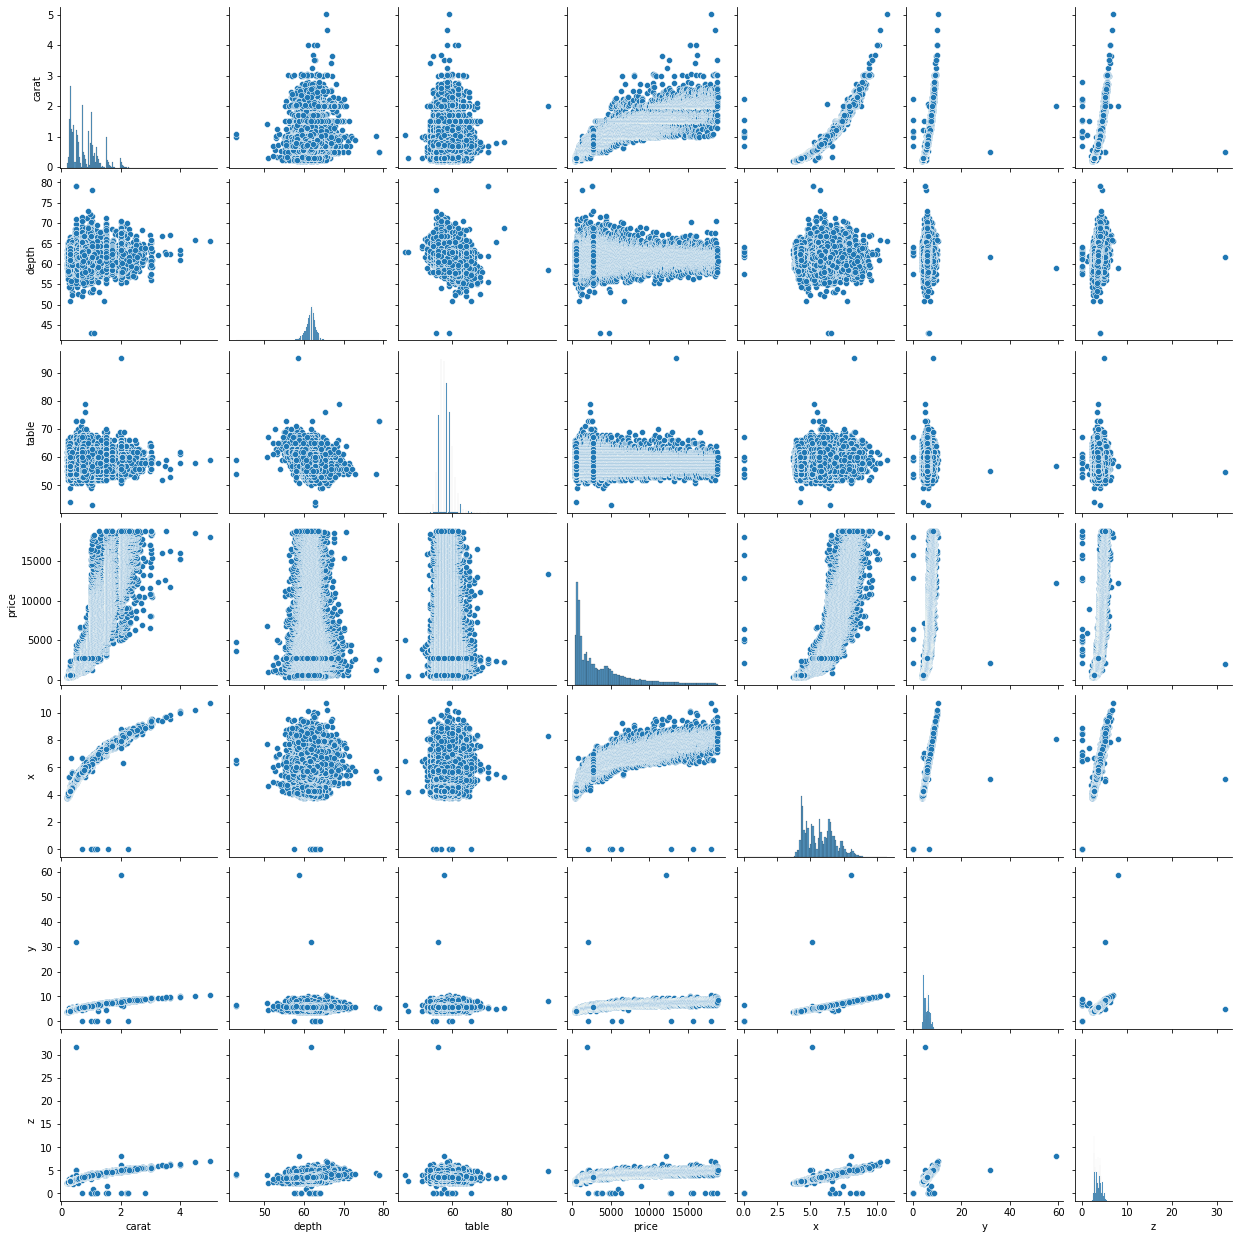

In [7]:
sns.pairplot(df)

In [21]:
dfc.describe()

,carat,depth,table,price,x,y,z,clarity1,color1,cut1
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,4.055456,4.407254,3.906416
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.645542,1.699858,1.116568
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,3.000000,3.000000,3.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,4.000000,4.000000,4.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,6.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,8.000000,7.000000,5.000000


In [22]:
dfc.corr()

,carat,depth,table,price,x,y,z,clarity1,color1,cut1
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824,-0.353837,-0.292021,-0.136218
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344,-0.067543,-0.046302,-0.220066
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646,-0.160579,-0.027476,-0.431738
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247,-0.148668,-0.173129,-0.055150
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336,-0.372725,-0.270637,-0.127095
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768,-0.358191,-0.263387,-0.122565
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000,-0.367025,-0.268071,-0.150714
clarity1,-0.353837,-0.067543,-0.160579,-0.148668,-0.372725,-0.358191,-0.367025,1.000000,-0.024591,0.189438
color1,-0.292021,-0.046302,-0.027476,-0.173129,-0.270637,-0.263387,-0.268071,-0.024591,1.000000,0.020318
cut1,-0.136218,-0.220066,-0.431738,-0.055150,-0.127095,-0.122565,-0.150714,0.189438,0.020318,1.000000


Text(0.5, 1.0, 'Features Correlating with Price')

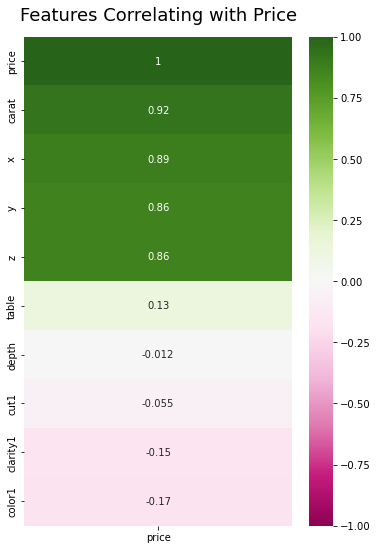

In [136]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(dfc.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with Carat')

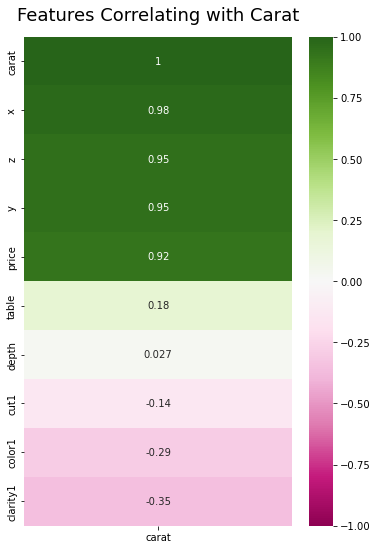

In [137]:
plt.figure(figsize=(6, 9))
heatmap = sns.heatmap(dfc.corr()[['carat']].sort_values(by='carat', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PiYG')
heatmap.set_title('Features Correlating with Carat', fontdict={'fontsize':18}, pad=16)

x, y e z tem uma correlação tão alta quanto o carat pq estão extremamente relacionadas, o peso do diamante depende do tamanho e de suas dimensões, logo, seria redundante utilizar todas essas variáveis no modelo de regressão. Utilizaremos apenas o carat e não o x, y e z.

## Como um diamante é avaliado?

#### Primeira avaliação: peso
Após pesado e verificada a autenticidade do diamante é que começa o verdadeiro trabalho técnico.
#### Segunda avaliação: cor
Neste momento será analisada a cor do diamante e a sua pureza.

TABELA COM A GRADUAÇÃO DE COR. ONDE “D” É O MAIS TRANSPARENTE E “Z” O DIAMANTE MAIS AMARELADO.

Os diamantes são classificados em letras pela cor, sendo que D é a letra usada para o diamante mais branco e Z para o diamante mais amarelado.

Quanto mais branco for o diamante mais ele será valorizado.

Após a classificação da cor do diamante, o próximo passo é analisar a existência de inclusões ou outros defeitos na pedra.

As inclusões são defeitos naturais existentes dentro da pedra e acabam desvalorizando a gema.

Existe uma tabela de classificação para a quantidade de inclusões que uma pedra apresenta - CLARITY
#### Terceira avaliação: Clarity (QUANTIDADE DE INCLUSÕES PRESENTES EM UM DIAMANTE)

#### Quarta avaliação: Cut (lapidação)
O ideal é que o diamante possua uma lapidação uniforme, bem feita, e que destaque a beleza da gema

## Simple Linear Regression

In [121]:
model = LinearRegression()

In [122]:
X = df[['carat']]
y = df['price']

In [123]:
model.fit(X,y)

LinearRegression()

In [124]:
model.score(X, y)

0.850426887514948

In [125]:
#aplicando no modelo do rick
y_predicted = model.predict(dfr[['carat']])
y_predicted

array([4804.87933349,  692.42236197, 1778.73175068, ..., 5580.81461113,
        149.26766762,  304.45472315])

In [126]:
model.coef_

array([7759.35277644])

In [127]:
model.intercept_

-2256.13169307385

In [128]:
dfr['price_predicted'] = y_predicted

In [129]:
dfr.to_csv('preditos.csv')

In [130]:
#X = df[['carat', 'x', 'y', 'z']]
#y = df['price']

In [131]:
#model.fit(X,y)

In [133]:
#model.score(X, y)
#0.855

## Equação da reta de regressão:

## price = 7759,4 * carat - 2256,13

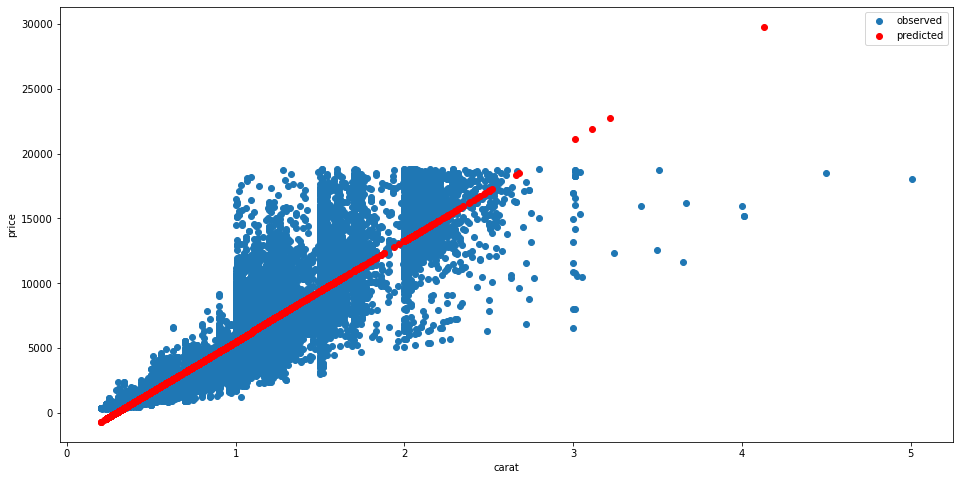

In [32]:
plt.figure(figsize=(16, 8))
plt.xlabel("carat")
plt.ylabel("price")

plt.scatter(X, y, label="observed")
plt.legend()

plt.scatter(dfr.carat, y_predicted, color="red", label="predicted")
plt.legend()

### RMSE = 1600

dados completamente dispersos, 'spread of residuals' - o quanto os meus pontos estão longe da reta de regressão linear

## Analisando outras variáveis para um modelo de regressão linear múltipla

<AxesSubplot:xlabel='carat', ylabel='price'>

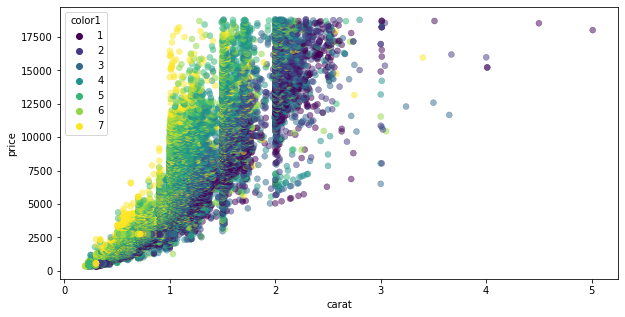

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfc, x='carat', y='price', hue='color1', edgecolor=None, alpha=0.5, palette='viridis')

<AxesSubplot:xlabel='carat', ylabel='price'>

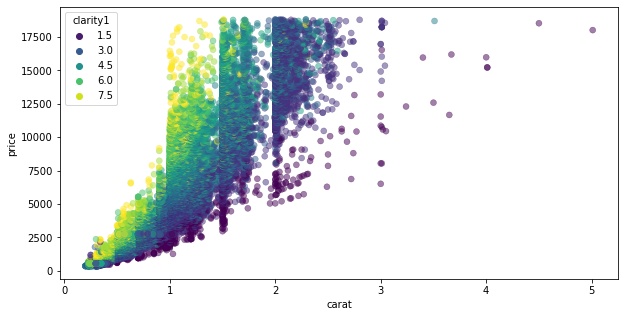

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfc, x='carat', y='price', hue='clarity1', edgecolor=None, alpha=0.5, palette='viridis')


<AxesSubplot:xlabel='carat', ylabel='price'>

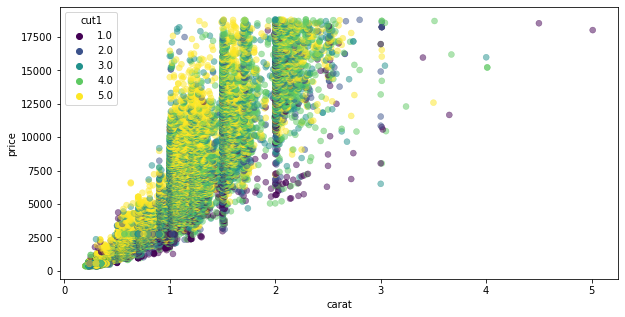

In [35]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=dfc, x='carat', y='price', hue='cut1', edgecolor=None, alpha=0.5, palette='viridis')

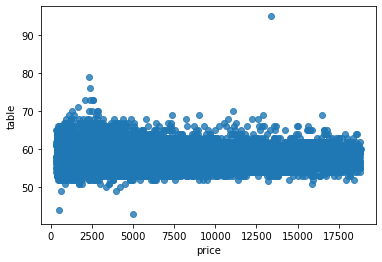

In [36]:
ax = sns.regplot(x='price', y='table', data=dfc)

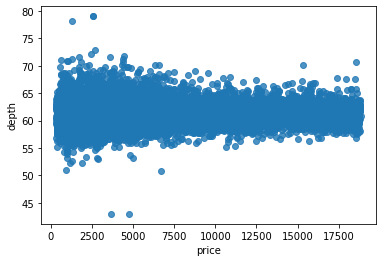

In [37]:
ax = sns.regplot(x='price', y='depth', data=dfc)

# Multiple Linear Regression - + de um coeficiente angular

A gente pode perceber neste gráfico um comportamento exponencial das variáveis, não estando a reta tão bem ajustada como gostaria. 

Farei uma transformação logaritmica nas variáveis para "ajustar" esse modelo exponencial para linear

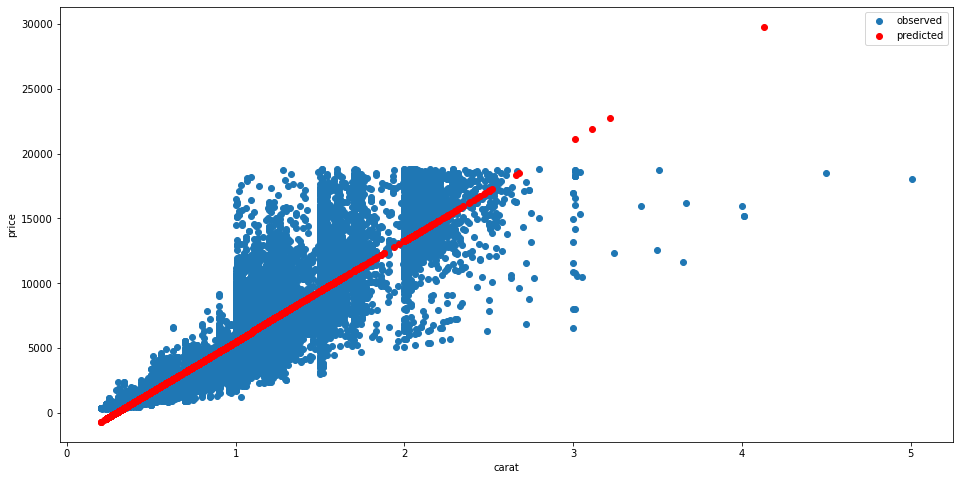

In [39]:
plt.figure(figsize=(16, 8))
plt.xlabel("carat")
plt.ylabel("price")

plt.scatter(X, y, label="observed")
plt.legend()

plt.scatter(dfr.carat, dfr.price_predicted, color="red", label="predicted")
plt.legend()

## RMSE: A metric that tells us how far apart the predicted values are from the observed values in a dataset, on average. The lower the RMSE, the better a model fits a dataset.

In [40]:
X = df[['carat']]
y = df['price']

In [41]:
X_ln = np.log(X)
y_ln = np.log(y)

In [42]:
model.fit(X_ln, y_ln)

LinearRegression()

In [43]:
model.score(X_ln, y_ln)

0.9332702432255211

In [44]:
model.intercept_

8.449483840202957

In [45]:
model.coef_

array([1.67574065])

## ln(price) = 8.44 + 1.68 * ln(carat)

In [46]:
#ricks dataset

In [47]:
y_predicted = model.predict(np.log(dfr[['carat']]))

In [48]:
y_predicted

array([8.2914436 , 6.82806396, 7.35367268, ..., 8.46615801, 6.48688491,
       6.59165282])

In [49]:
dfr['price_predicted'] = np.exp(y_predicted)

In [50]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,3989.589416
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,923.401338
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1561.922447
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,5481.855856
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,18593.886616


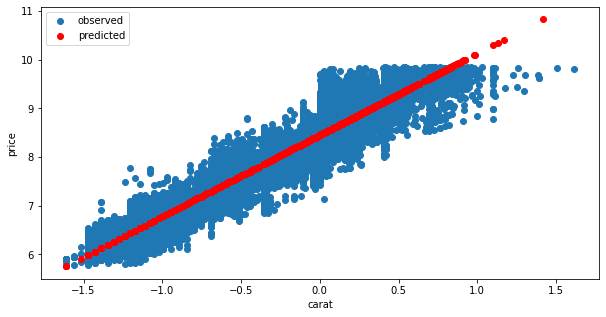

In [51]:
plt.figure(figsize=(10, 5))
plt.xlabel("carat")
plt.ylabel("price")

plt.scatter(X_ln, y_ln, label="observed")
plt.legend()

plt.scatter(np.log(dfr.carat), np.log(dfr.price_predicted), color="red", label="predicted")
plt.legend()

### Utilizando carat + color

In [159]:
X = dfc[['carat', 'color1']]
y = dfc['price']
model.fit(X,y)

LinearRegression()

In [160]:
#transformação logarítmica
X_ln = np.log(X)
y_ln = np.log(y)

In [161]:
model.fit(X_ln, y_ln)

LinearRegression()

In [162]:
model.coef_

array([1.72758011, 0.23209893])

In [163]:
model.intercept_

8.148714558797737

## ln(price) = 7.49+ 1.72 * ln(carat) + 0.23 * ln(color1) 

In [164]:
X = dfr[['carat', 'color1']]

In [165]:
X_ln = np.log(X)

In [166]:
y_predicted = model.predict(X_ln)

In [167]:
#converting back
dfr['price_predicted'] = np.exp(y_predicted)

In [168]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,3792.467107
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,944.527167
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1442.295083
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,5625.853586
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,19817.112251


In [169]:
dfr.to_csv('preditosr.csv')

Your root mean squared error is 1628.7343996693187

### Utilizando carat + color + clarity

In [65]:
X = dfc[['carat', 'color1', 'clarity1']]
y = dfc['price']
model.fit(X,y)

LinearRegression()

In [66]:
#transformação logarítmica
X_ln = np.log(X)
y_ln = np.log(y)

In [67]:
model.fit(X_ln, y_ln)

LinearRegression()

In [68]:
model.coef_

array([1.87774078, 0.27729368, 0.4931445 ])

In [69]:
model.intercept_

7.497692667546138

## ln(price) = 7.50+ 1.88 * ln(carat) + 0.28 * ln(color1) + 0.49 * ln(clarity1)

In [70]:
X = dfr[['carat', 'color1', 'clarity1']]

In [71]:
X_ln = np.log(X)

In [72]:
y_predicted = model.predict(X_ln)

In [73]:
#converting back
dfr['price_predicted'] = np.exp(y_predicted)

In [74]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,2884.369522
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,907.552192
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1419.514161
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,7007.642334
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,17527.263959


In [75]:
dfr.to_csv('preditosr.csv')

Your root mean squared error is 922.9359658426577

### Utilizando carat + color + clarity + cut

In [76]:
X = dfc[['carat', 'color1', 'clarity1', 'cut1']]
y = dfc['price']
model.fit(X,y)

LinearRegression()

In [77]:
#transformação logarítmica
X_ln = np.log(X)
y_ln = np.log(y)

In [78]:
model.fit(X_ln, y_ln)

LinearRegression()

In [79]:
X = dfr[['carat', 'color1', 'clarity1', 'cut1']]

In [80]:
X_ln = np.log(X)

In [81]:
y_predicted = model.predict(X_ln)

In [82]:
#converting back
dfr['price_predicted'] = np.exp(y_predicted)

In [83]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,2934.802496
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,852.431071
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1427.213128
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,6598.193123
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,17427.754362


In [84]:
#com o cut o preço voltou ao aumentar, suspeito que vá piorar o RMSE

In [85]:
dfr.to_csv('preditosr.csv')

Your root mean squared error is 966.2356482581573

# Até agora o melhor modelo foi com o carat, color e clarity. Vamos ver a influencia de depth e table

### Utilizando carat + color + clarity + depth

In [170]:
X = dfc[['carat', 'color1', 'clarity1', 'depth']]
y = dfc['price']
model.fit(X,y)

LinearRegression()

In [171]:
#transformação logarítmica
X_ln = np.log(X)
y_ln = np.log(y)

In [172]:
model.fit(X_ln, y_ln)

LinearRegression()

In [173]:
X = dfr[['carat', 'color1', 'clarity1', 'depth']]

In [174]:
X_ln = np.log(X)

In [175]:
y_predicted = model.predict(X_ln)

In [176]:
#converting back
dfr['price_predicted'] = np.exp(y_predicted)

In [177]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,2854.201476
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,916.921056
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1419.187249
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,7025.053699
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,17558.326491


In [178]:
dfr.to_csv('preditosr.csv')

Your root mean squared error is 914.8316596521637

### Utilizando carat + color + clarity + depth + table

In [95]:
X = dfc[['carat', 'color1', 'clarity1', 'depth', 'table']]
y = dfc['price']
model.fit(X,y)

LinearRegression()

In [96]:
#transformação logarítmica
X_ln = np.log(X)
y_ln = np.log(y)

In [97]:
model.fit(X_ln, y_ln)

LinearRegression()

In [98]:
X = dfr[['carat', 'color1', 'clarity1', 'depth',  'table']]

In [99]:
X_ln = np.log(X)

In [100]:
y_predicted = model.predict(X_ln)

In [101]:
#converting back
dfr['price_predicted'] = np.exp(y_predicted)

In [102]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,2858.382286
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,894.498884
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1432.718394
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,7121.006515
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,17774.259526


In [103]:
#Só com depth ficou melhor que com table também.

In [104]:
#testando com tudo:

In [150]:
X = dfc[['carat', 'color1', 'clarity1', 'cut1', 'depth', 'table']]
y = dfc['price']
model.fit(X,y)

LinearRegression()

In [151]:
#transformação logarítmica
X_ln = np.log(X)
y_ln = np.log(y)

In [152]:
model.fit(X_ln, y_ln)

LinearRegression()

In [153]:
X = dfr[['carat', 'color1', 'clarity1', 'cut1', 'depth',  'table']]

In [154]:
X_ln = np.log(X)

In [155]:
y_predicted = model.predict(X_ln)

In [156]:
#converting back
dfr['price_predicted'] = np.exp(y_predicted)

In [157]:
dfr.to_csv('preditosr.csv')

In [145]:
dfr.head()

,carat,cut,color,clarity,depth,table,x,y,z,clarity1,color1,cut1,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2.0,3.0,4.0,2927.793809
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4.0,5.0,2.0,854.320997
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,4.0,3.0,4.0,1427.722215
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,5.0,4.0,2.0,6617.081948
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,2.0,4.0,3.0,17448.551472


In [158]:
#RMSE = 961

## O melhor modelo foi com 'carat', 'color1', 'clarity1', 'depth', com  RMSE de 914.8316596521637